In [1]:
R.version

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          0.5                         
year           2021                        
month          03                          
day            31                          
svn rev        80133                       
language       R                           
version.string R version 4.0.5 (2021-03-31)
nickname       Shake and Throw             

In [2]:
library(DiffBind)

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    Filter, Find, Map, Position, Reduce, anyDuplicated, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, rbind, rownames, sapply, setdiff, sort, table,
    tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


At

In [6]:
CorcesDataInfo =read.csv("./Corces2016_with_calderon_pDC_meta.csv",
                          sep = ";") #, header=TRUE,row.names=NULL
CorcesDataInfo

SampleID,Tissue,Condition,donorID,Treatment,bamReads,Replicate,ControlID,Peaks,PeakCaller
<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>
Bcell_1,Bcell,Bcell,1022,control,/project/scATAC_analysis/10X_PBMC_analysis/AnnotationQuestion/bulk_ATAC_data/GSE74912_Corces2016/GSE74912_Corces2016_ENCODE_v3_processed/Bcell/atac/c3305399-347a-4f14-871d-696a4b7bd760/call-filter/shard-0/execution/SRR2920492_1.fastq.trim.srt.nodup.no_chrM_MT.bam,1,Bcell,/project/scATAC_analysis/scATAcat_notebooks_for_paper/jan2024/data/Corces2016_bulk_ATAC/01_ENCODE_cCRE_coverages/Bcell/SRR2920492_NOTmerged_scATAC_overlap_ENCODE_cCRE_coverage_6col.bed,bed
Bcell_2,Bcell,Bcell,4983,control,/project/scATAC_analysis/10X_PBMC_analysis/AnnotationQuestion/bulk_ATAC_data/GSE74912_Corces2016/GSE74912_Corces2016_ENCODE_v3_processed/Bcell/atac/c3305399-347a-4f14-871d-696a4b7bd760/call-filter/shard-1/execution/SRR2920513_1.fastq.trim.srt.nodup.no_chrM_MT.bam,2,Bcell,/project/scATAC_analysis/scATAcat_notebooks_for_paper/jan2024/data/Corces2016_bulk_ATAC/01_ENCODE_cCRE_coverages/Bcell/SRR2920513_NOTmerged_scATAC_overlap_ENCODE_cCRE_coverage_6col.bed,bed
Bcell_3,Bcell,Bcell,5483,control,/project/scATAC_analysis/10X_PBMC_analysis/AnnotationQuestion/bulk_ATAC_data/GSE74912_Corces2016/GSE74912_Corces2016_ENCODE_v3_processed/Bcell/atac/c3305399-347a-4f14-871d-696a4b7bd760/call-filter/shard-2/execution/SRR2920517_1.fastq.trim.srt.nodup.no_chrM_MT.bam,3,Bcell,/project/scATAC_analysis/scATAcat_notebooks_for_paper/jan2024/data/Corces2016_bulk_ATAC/01_ENCODE_cCRE_coverages/Bcell/SRR2920517_NOTmerged_scATAC_overlap_ENCODE_cCRE_coverage_6col.bed,bed
Bcell_4,Bcell,Bcell,5483,control,/project/scATAC_analysis/10X_PBMC_analysis/AnnotationQuestion/bulk_ATAC_data/GSE74912_Corces2016/GSE74912_Corces2016_ENCODE_v3_processed/Bcell/atac/c3305399-347a-4f14-871d-696a4b7bd760/call-filter/shard-3/execution/SRR2920544_1.fastq.trim.srt.nodup.no_chrM_MT.bam,4,Bcell,/project/scATAC_analysis/scATAcat_notebooks_for_paper/jan2024/data/Corces2016_bulk_ATAC/01_ENCODE_cCRE_coverages/Bcell/SRR2920544_NOTmerged_scATAC_overlap_ENCODE_cCRE_coverage_6col.bed,bed
CD4Tcell_1,CD4Tcell,CD4Tcell,1022,control,/project/scATAC_analysis/10X_PBMC_analysis/AnnotationQuestion/bulk_ATAC_data/GSE74912_Corces2016/GSE74912_Corces2016_ENCODE_v3_processed/CD4Tcell/atac/aaead0dc-374c-4a33-b443-e7bd45c3b3b6/call-filter/shard-0/execution/SRR2920493_1.fastq.trim.srt.nodup.no_chrM_MT.bam,1,CD4Tcell,/project/scATAC_analysis/scATAcat_notebooks_for_paper/jan2024/data/Corces2016_bulk_ATAC/01_ENCODE_cCRE_coverages/CD4Tcell/SRR2920493_NOTmerged_scATAC_overlap_ENCODE_cCRE_coverage_6col.bed,bed
CD4Tcell_2,CD4Tcell,CD4Tcell,2596,control,/project/scATAC_analysis/10X_PBMC_analysis/AnnotationQuestion/bulk_ATAC_data/GSE74912_Corces2016/GSE74912_Corces2016_ENCODE_v3_processed/CD4Tcell/atac/aaead0dc-374c-4a33-b443-e7bd45c3b3b6/call-filter/shard-1/execution/SRR2920496_1.fastq.trim.srt.nodup.no_chrM_MT.bam,2,CD4Tcell,/project/scATAC_analysis/scATAcat_notebooks_for_paper/jan2024/data/Corces2016_bulk_ATAC/01_ENCODE_cCRE_coverages/CD4Tcell/SRR2920496_NOTmerged_scATAC_overlap_ENCODE_cCRE_coverage_6col.bed,bed
CD4Tcell_3,CD4Tcell,CD4Tcell,4983,control,/project/scATAC_analysis/10X_PBMC_analysis/AnnotationQuestion/bulk_ATAC_data/GSE74912_Corces2016/GSE74912_Corces2016_ENCODE_v3_processed/CD4Tcell/atac/aaead0dc-374c-4a33-b443-e7bd45c3b3b6/call-filter/shard-2/execution/SRR2920514_1.fastq.trim.srt.nodup.no_chrM_MT.bam,3,CD4Tcell,/project/scATAC_analysis/scATAcat_notebooks_for_paper/jan2024/data/Corces2016_bulk_ATAC/01_ENCODE_cCRE_coverages/CD4Tcell/SRR2920514_NOTmerged_scATAC_overlap_ENCODE_cCRE_coverage_6col.bed,bed
CD4Tcell_4,CD4Tcell,CD4Tcell,5483,control,/project/scATAC_analysis/10X_PBMC_analysis/AnnotationQuestion/bulk_ATAC_data/GSE74912_Corces2016/GSE74912_Corces2016_ENCODE_v3_processed/CD4Tcell/atac/aaead0dc-374c-4a33-b443-e7bd45c3b3b6/call-filter/shard-3/execution/SRR2920518_1.fastq.trim.srt.nodup.no_chrM_MT.bam,4,CD4Tcell,/project/scATAC_an

In [7]:
corces_DBdata <- dba(sampleSheet=CorcesDataInfo) 

Bcell_1 Bcell  Bcell control 1 bed

Bcell_2 Bcell  Bcell control 2 bed

Bcell_3 Bcell  Bcell control 3 bed

Bcell_4 Bcell  Bcell control 4 bed

CD4Tcell_1 CD4Tcell  CD4Tcell control 1 bed

CD4Tcell_2 CD4Tcell  CD4Tcell control 2 bed

CD4Tcell_3 CD4Tcell  CD4Tcell control 3 bed

CD4Tcell_4 CD4Tcell  CD4Tcell control 4 bed

CD4Tcell_5 CD4Tcell  CD4Tcell control 5 bed

CD8Tcell_1 CD8Tcell  CD8Tcell control 1 bed

CD8Tcell_2 CD8Tcell  CD8Tcell control 2 bed

CD8Tcell_3 CD8Tcell  CD8Tcell control 3 bed

CD8Tcell_4 CD8Tcell  CD8Tcell control 4 bed

CD8Tcell_5 CD8Tcell  CD8Tcell control 5 bed

Mono_1 Mono  Mono control 1 bed

Mono_2 Mono  Mono control 2 bed

Mono_3 Mono  Mono control 3 bed

Mono_4 Mono  Mono control 4 bed

Mono_5 Mono  Mono control 5 bed

Mono_6 Mono  Mono control 6 bed

NKcell_1 NKcell  NKcell control 1 bed

NKcell_2 NKcell  NKcell control 2 bed

NKcell_3 NKcell  NKcell control 3 bed

NKcell_4 NKcell  NKcell control 4 bed

NKcell_5 NKcell  NKcell control 5 bed

NKcell_6 NKce

In [8]:
corces <- dba.count(corces_DBdata)

Computing summits...

Re-centering peaks...

Reads will be counted as Paired-end.



In [9]:
corces

29 Samples, 579423 sites in matrix:
           ID   Tissue Condition Treatment Replicate    Reads FRiP
1     Bcell_1    Bcell     Bcell   control         1 10633743 0.24
2     Bcell_2    Bcell     Bcell   control         2 33051601 0.30
3     Bcell_3    Bcell     Bcell   control         3 12871788 0.44
4     Bcell_4    Bcell     Bcell   control         4  2908237 0.57
5  CD4Tcell_1 CD4Tcell  CD4Tcell   control         1  5758439 0.61
6  CD4Tcell_2 CD4Tcell  CD4Tcell   control         2 10731358 0.50
7  CD4Tcell_3 CD4Tcell  CD4Tcell   control         3 15086963 0.41
8  CD4Tcell_4 CD4Tcell  CD4Tcell   control         4  8500373 0.52
9  CD4Tcell_5 CD4Tcell  CD4Tcell   control         5  7002029 0.48
10 CD8Tcell_1 CD8Tcell  CD8Tcell   control         1  4771124 0.41
11 CD8Tcell_2 CD8Tcell  CD8Tcell   control         2 11230780 0.45
12 CD8Tcell_3 CD8Tcell  CD8Tcell   control         3 20228671 0.48
13 CD8Tcell_4 CD8Tcell  CD8Tcell   control         4  7618212 0.66
14 CD8Tcell_5 CD8Tcell  CD

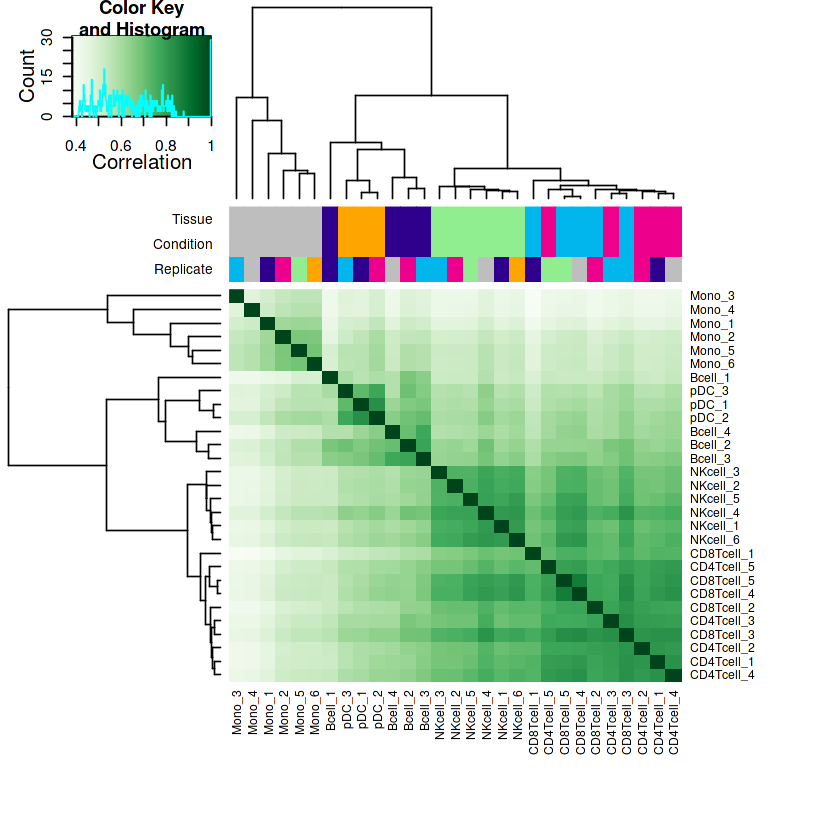

In [10]:
plot(corces)

In [11]:
info <- dba.show(corces)
libsizes <- cbind(LibReads=info$Reads, FRiP=info$FRiP,PeakReads=round(info$Reads * info$FRiP))
rownames(libsizes) <- info$ID
libsizes

,LibReads,FRiP,PeakReads
Bcell_1,10633743,0.24,2552098
Bcell_2,33051601,0.30,9915480
Bcell_3,12871788,0.44,5663587
Bcell_4,2908237,0.57,1657695
CD4Tcell_1,5758439,0.61,3512648
CD4Tcell_2,10731358,0.50,5365679
CD4Tcell_3,15086963,0.41,6185655
CD4Tcell_4,8500373,0.52,4420194
CD4Tcell_5,7002029,0.48,3360974
CD8Tcell_1,4771124,0.41,1956161


In [12]:
corces_norm <- dba.normalize(corces)

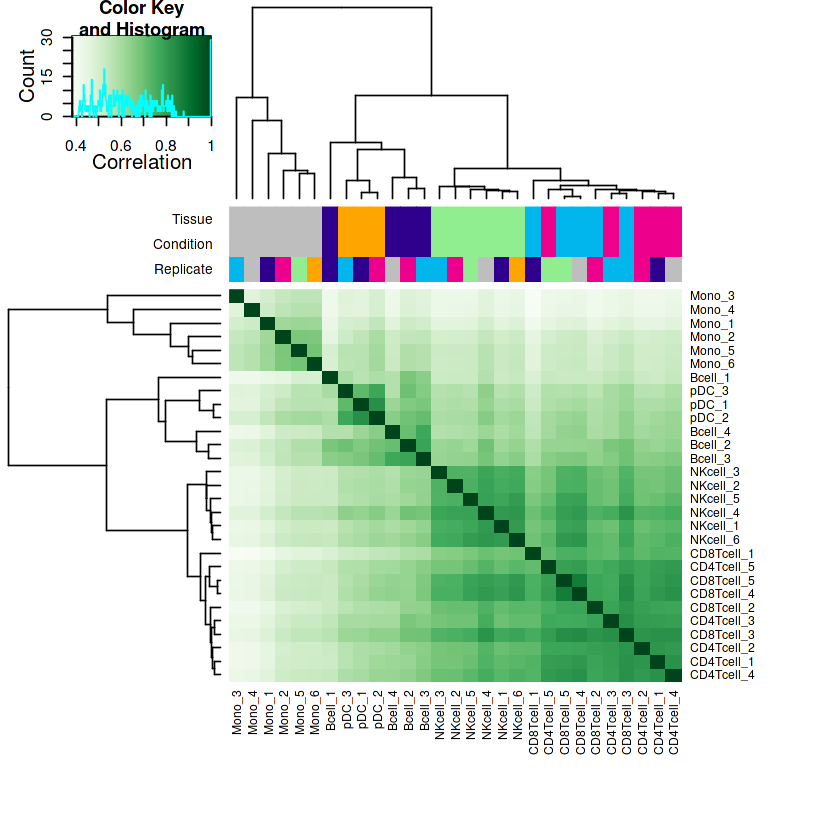

In [13]:
plot(corces_norm)

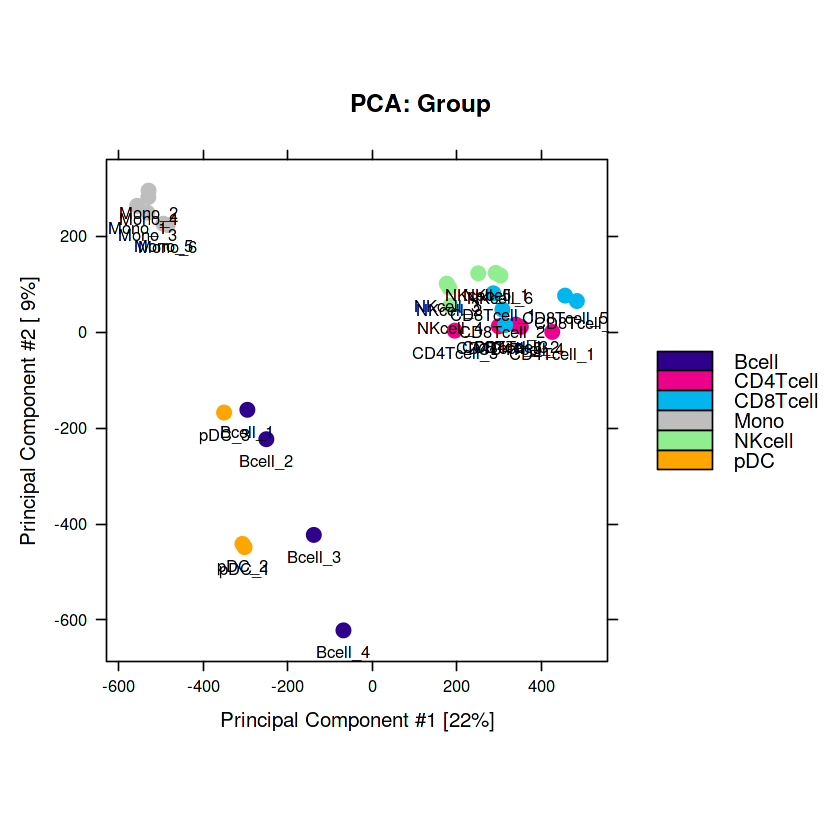

In [14]:
dba.plotPCA(corces_norm,  attributes=DBA_CONTROL, label=DBA_ID)

In [15]:
norm <- dba.normalize(corces_norm, bRetrieve=TRUE)
normlibs <- cbind(FullLibSize=norm$lib.sizes, NormFacs=norm$norm.factors, NormLibSize=round(norm$lib.sizes/norm$norm.factors))
rownames(normlibs) <- info$ID
normlibs

,FullLibSize,NormFacs,NormLibSize
Bcell_1,10633743,0.9997727,10636161
Bcell_2,33051601,3.1074747,10636161
Bcell_3,12871788,1.2101912,10636161
Bcell_4,2908237,0.2734292,10636161
CD4Tcell_1,5758439,0.5414020,10636161
CD4Tcell_2,10731358,1.0089503,10636161
CD4Tcell_3,15086963,1.4184595,10636161
CD4Tcell_4,8500373,0.7991956,10636161
CD4Tcell_5,7002029,0.6583230,10636161
CD8Tcell_1,4771124,0.4485758,10636161


In [16]:
corces_norm <- dba.contrast(corces_norm, categories=DBA_CONDITION,minMembers = 2)

Computing results names...



In [17]:
corces_norm

29 Samples, 579423 sites in matrix:
           ID   Tissue Condition Treatment Replicate    Reads FRiP
1     Bcell_1    Bcell     Bcell   control         1 10633743 0.24
2     Bcell_2    Bcell     Bcell   control         2 33051601 0.30
3     Bcell_3    Bcell     Bcell   control         3 12871788 0.44
4     Bcell_4    Bcell     Bcell   control         4  2908237 0.57
5  CD4Tcell_1 CD4Tcell  CD4Tcell   control         1  5758439 0.61
6  CD4Tcell_2 CD4Tcell  CD4Tcell   control         2 10731358 0.50
7  CD4Tcell_3 CD4Tcell  CD4Tcell   control         3 15086963 0.41
8  CD4Tcell_4 CD4Tcell  CD4Tcell   control         4  8500373 0.52
9  CD4Tcell_5 CD4Tcell  CD4Tcell   control         5  7002029 0.48
10 CD8Tcell_1 CD8Tcell  CD8Tcell   control         1  4771124 0.41
11 CD8Tcell_2 CD8Tcell  CD8Tcell   control         2 11230780 0.45
12 CD8Tcell_3 CD8Tcell  CD8Tcell   control         3 20228671 0.48
13 CD8Tcell_4 CD8Tcell  CD8Tcell   control         4  7618212 0.66
14 CD8Tcell_5 CD8Tcell  CD

In [18]:
corces_norm <- dba.analyze(corces_norm)

Applying Blacklist/Greylists...

Genome detected: Hsapiens.UCSC.hg38

Applying blacklist...

Removed: 263 of 579423 intervals.

Re-normalizing...

Removed 263 (of 579423) consensus peaks.

Analyzing...

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates



In [19]:
dba.show(corces_norm, bContrasts=TRUE)

,Factor,Group,Samples,Group2,Samples2,DB.DESeq2
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Condition,Bcell,4,CD4Tcell,5,46645
2,Condition,Bcell,4,CD8Tcell,5,53466
3,Condition,Bcell,4,Mono,6,42782
4,Condition,Bcell,4,NKcell,6,47172
5,Condition,Bcell,4,pDC,3,28315
6,Condition,CD4Tcell,5,CD8Tcell,5,5770
7,Condition,CD4Tcell,5,Mono,6,72912
8,Condition,CD4Tcell,5,NKcell,6,32030
9,Condition,CD4Tcell,5,pDC,3,70972


In [20]:
dba.show(corces_norm, bContrasts = 1)

,Factor,Group,Samples,Group2,Samples2,DB.DESeq2
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Condition,Bcell,4,CD4Tcell,5,46645
2,Condition,Bcell,4,CD8Tcell,5,53466
3,Condition,Bcell,4,Mono,6,42782
4,Condition,Bcell,4,NKcell,6,47172
5,Condition,Bcell,4,pDC,3,28315
6,Condition,CD4Tcell,5,CD8Tcell,5,5770
7,Condition,CD4Tcell,5,Mono,6,72912
8,Condition,CD4Tcell,5,NKcell,6,32030
9,Condition,CD4Tcell,5,pDC,3,70972


In [21]:
Corces_Bcell_vs_CD4Tcell <- dba.report(corces_norm, contrast = 1)

In [22]:
Corces_Bcell_vs_CD4Tcell

GRanges object with 46645 ranges and 6 metadata columns:
         seqnames              ranges strand |      Conc Conc_Bcell
            <Rle>           <IRanges>  <Rle> | <numeric>  <numeric>
  420382     chr5   52725118-52725990      * |   8.26887    2.17649
  273545     chr2   60819526-60819926      * |   7.75536    2.73226
   98147    chr11   85752349-85753568      * |   8.07082    3.23234
  532542     chr8 100430420-100431076      * |   7.58446    2.80925
   22324     chr1   91804409-91805071      * |   8.13474    2.56265
     ...      ...                 ...    ... .       ...        ...
  133741    chr12 116337223-116337623      * |   1.14242    2.08224
  354700     chr3   56590887-56591649      * |   2.02369    0.00000
  455925     chr6   31899795-31900741      * |   2.21631    2.89737
  127721    chr12   92408523-92408923      * |   2.15021    2.93967
  463688     chr6   73774396-73774796      * |   1.84184    2.60115
         Conc_CD4Tcell      Fold     p-value         FDR
  

In [23]:
contrast_matrix = dba.show(corces_norm, bContrasts = TRUE)
contrast_matrix

,Factor,Group,Samples,Group2,Samples2,DB.DESeq2
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Condition,Bcell,4,CD4Tcell,5,46645
2,Condition,Bcell,4,CD8Tcell,5,53466
3,Condition,Bcell,4,Mono,6,42782
4,Condition,Bcell,4,NKcell,6,47172
5,Condition,Bcell,4,pDC,3,28315
6,Condition,CD4Tcell,5,CD8Tcell,5,5770
7,Condition,CD4Tcell,5,Mono,6,72912
8,Condition,CD4Tcell,5,NKcell,6,32030
9,Condition,CD4Tcell,5,pDC,3,70972


In [24]:
    Bcell_VS_CD4Tcell <- dba.report(corces_norm, contrast = 1)
    Bcell_VS_CD4Tcell_df <- as.data.frame(Bcell_VS_CD4Tcell)

In [25]:
    Bcell_VS_NKcell<- dba.report(corces_norm, contrast = 4)
    Bcell_VS_NKcell_df <- as.data.frame(Bcell_VS_NKcell)

In [26]:
dim(Bcell_VS_NKcell_df)

[1] 47172    11

In [27]:
max(Bcell_VS_CD4Tcell_df$FDR)

[1] 0.04998013

In [28]:
dim(Bcell_VS_CD4Tcell_df)

[1] 46645    11

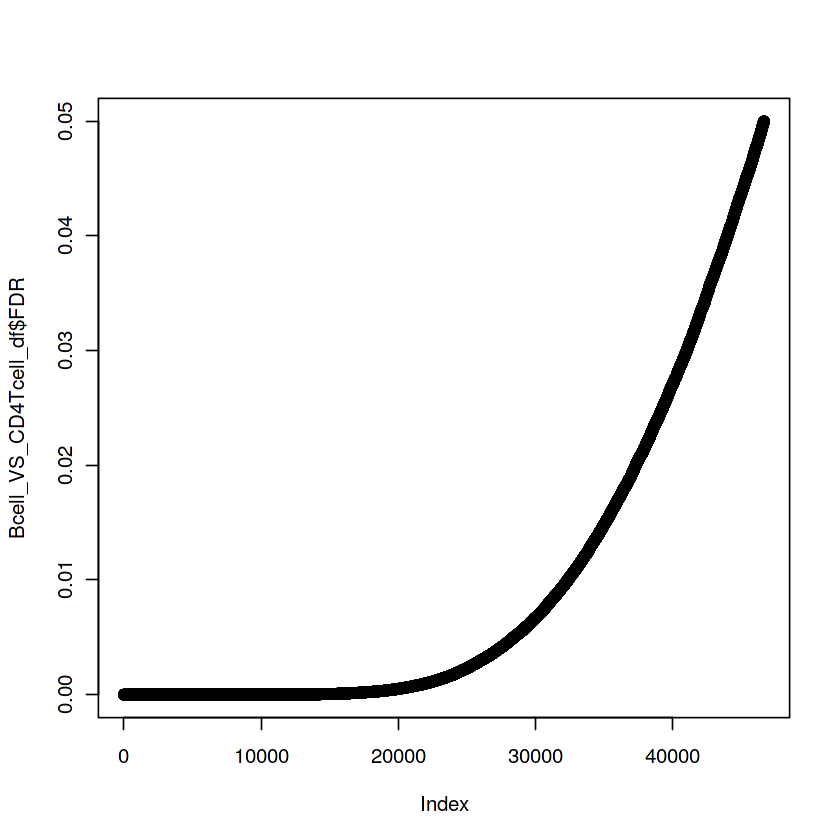

In [29]:
plot(Bcell_VS_CD4Tcell_df$FDR)

In [30]:
head(Bcell_VS_CD4Tcell_df)

,seqnames,start,end,width,strand,Conc,Conc_Bcell,Conc_CD4Tcell,Fold,p.value,FDR
,<fct>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
420382,chr5,52725118,52725990,873,*,8.268873,2.176491,9.107442,-6.746000,6.670575e-63,2.739765e-57
273545,chr2,60819526,60819926,401,*,7.755361,2.732261,8.583502,-5.605082,3.146376e-62,6.461460e-57
98147,chr11,85752349,85753568,1220,*,8.070817,3.232335,8.896227,-5.510909,5.143817e-61,7.042296e-56
532542,chr8,100430420,100431076,657,*,7.584457,2.809254,8.408846,-5.623631,5.797672e-52,5.953108e-47
22324,chr1,91804409,91805071,663,*,8.134740,2.562653,8.969195,-6.329079,8.374033e-50,6.878833e-45
494616,chr7,50360156,50360889,734,*,7.858831,3.159239,8.681939,-5.412568,1.752995e-49,1.199995e-44


In [32]:
granges_to_df <- function(granges_obj, contrast){
    report <- dba.report(granges_obj, contrast = contrast)
    report_df <- as.data.frame(report)
    region= paste(report_df$seqnames,report_df$start,sep=":")
    region=paste(region,report_df$end,sep="-")
    report_df["region"]=region
    return(report_df)
}

In [33]:
for (i in seq(1, NROW(contrast_matrix))){
    save_name = paste( gsub("-", "_", contrast_matrix[i,2], fixed = TRUE) , "_VS_" ,gsub("-", "_", contrast_matrix[i,4], fixed = TRUE), sep="")
    
    print(save_name)
}

[1] "Bcell_VS_CD4Tcell"
[1] "Bcell_VS_CD8Tcell"
[1] "Bcell_VS_Mono"
[1] "Bcell_VS_NKcell"
[1] "Bcell_VS_pDC"
[1] "CD4Tcell_VS_CD8Tcell"
[1] "CD4Tcell_VS_Mono"
[1] "CD4Tcell_VS_NKcell"
[1] "CD4Tcell_VS_pDC"
[1] "CD8Tcell_VS_Mono"
[1] "CD8Tcell_VS_NKcell"
[1] "CD8Tcell_VS_pDC"
[1] "Mono_VS_NKcell"
[1] "Mono_VS_pDC"
[1] "pDC_VS_NKcell"


In [34]:
Bcell_VS_CD4Tcell= granges_to_df(corces_norm, contrast = 1)
Bcell_VS_CD8Tcell= granges_to_df(corces_norm, contrast =2 )
Bcell_VS_Mono= granges_to_df(corces_norm, contrast =3 )
Bcell_VS_NKcell= granges_to_df(corces_norm, contrast =4 )
Bcell_VS_pDC= granges_to_df(corces_norm, contrast =5 )
CD4Tcell_VS_CD8Tcell= granges_to_df(corces_norm, contrast = 6)
CD4Tcell_VS_Mono= granges_to_df(corces_norm, contrast = 7)
CD4Tcell_VS_NKcell= granges_to_df(corces_norm, contrast =8 )
CD4Tcell_VS_pDC= granges_to_df(corces_norm, contrast = 9)
CD8Tcell_VS_Mono= granges_to_df(corces_norm, contrast = 10)
CD8Tcell_VS_NKcell= granges_to_df(corces_norm, contrast = 11)
CD8Tcell_VS_pDC= granges_to_df(corces_norm, contrast = 12)
Mono_VS_NKcell= granges_to_df(corces_norm, contrast = 13)
Mono_VS_pDC= granges_to_df(corces_norm, contrast = 14)
pDC_VS_NKcell= granges_to_df(corces_norm, contrast = 15)


In [35]:
head(Bcell_VS_CD4Tcell_df)

,seqnames,start,end,width,strand,Conc,Conc_Bcell,Conc_CD4Tcell,Fold,p.value,FDR
,<fct>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
420382,chr5,52725118,52725990,873,*,8.268873,2.176491,9.107442,-6.746000,6.670575e-63,2.739765e-57
273545,chr2,60819526,60819926,401,*,7.755361,2.732261,8.583502,-5.605082,3.146376e-62,6.461460e-57
98147,chr11,85752349,85753568,1220,*,8.070817,3.232335,8.896227,-5.510909,5.143817e-61,7.042296e-56
532542,chr8,100430420,100431076,657,*,7.584457,2.809254,8.408846,-5.623631,5.797672e-52,5.953108e-47
22324,chr1,91804409,91805071,663,*,8.134740,2.562653,8.969195,-6.329079,8.374033e-50,6.878833e-45
494616,chr7,50360156,50360889,734,*,7.858831,3.159239,8.681939,-5.412568,1.752995e-49,1.199995e-44


In [36]:
combined_regions =c()
for (df_ in list(Bcell_VS_CD4Tcell, Bcell_VS_CD8Tcell, Bcell_VS_Mono, Bcell_VS_NKcell, Bcell_VS_pDC, CD4Tcell_VS_CD8Tcell, CD4Tcell_VS_Mono, CD4Tcell_VS_NKcell, CD4Tcell_VS_pDC, CD8Tcell_VS_Mono, CD8Tcell_VS_NKcell, CD8Tcell_VS_pDC, Mono_VS_NKcell, Mono_VS_pDC, pDC_VS_NKcell )){
    combined_regions =  c(combined_regions,df_[["region"]] )
    }

In [54]:
sum_=0
combined_regions_size =c()
for (df_ in list(Bcell_VS_CD4Tcell, Bcell_VS_CD8Tcell, Bcell_VS_Mono, Bcell_VS_NKcell, Bcell_VS_pDC, CD4Tcell_VS_CD8Tcell, CD4Tcell_VS_Mono, CD4Tcell_VS_NKcell, CD4Tcell_VS_pDC, CD8Tcell_VS_Mono, CD8Tcell_VS_NKcell, CD8Tcell_VS_pDC, Mono_VS_NKcell, Mono_VS_pDC, pDC_VS_NKcell )){
    combined_regions_size = c(combined_regions_size,as.numeric(as.character(dim(df_)[1])) )
    print(dim(df_))
    sum_=sum_+as.integer(NROW(df_))
    }

[1] 46645    12
[1] 53466    12
[1] 42782    12
[1] 47172    12
[1] 28315    12
[1] 5770   12
[1] 72912    12
[1] 32030    12
[1] 70972    12
[1] 79999    12
[1] 15673    12
[1] 77416    12
[1] 67820    12
[1] 43635    12
[1] 66681    12


In [55]:
as.numeric(as.character(dim(df_)[1]))

[1] 66681

In [56]:
combined_regions_size

[1] 46645 53466 42782 47172 28315  5770 72912 32030 70972 79999 15673 77416
[13] 67820 43635 66681

In [57]:
# plot the number of diff regions per comparison

comparisons <- c("Bcell_VS_CD4Tcell", "Bcell_VS_CD8Tcell", "Bcell_VS_Mono", "Bcell_VS_NKcell", "Bcell_VS_pDC", "CD4Tcell_VS_CD8Tcell", "CD4Tcell_VS_Mono", "CD4Tcell_VS_NKcell", "CD4Tcell_VS_pDC", "CD8Tcell_VS_Mono", "CD8Tcell_VS_NKcell", "CD8Tcell_VS_pDC", "Mono_VS_NKcell", "Mono_VS_pDC", "pDC_VS_NKcell")
num_diff_reg <- combined_regions_size #c(46645 , 53466 , 42782 , 47172 , 28315 , 5770, 72912 , 32030 , 70972 , 79999 , 15673 , 77416 , 67820 , 43635 , 66681)

num_diff_reg_per_comparison_df <- data.frame(comparisons,num_diff_reg)
num_diff_reg_per_comparison_df

comparisons,num_diff_reg
<chr>,<dbl>
Bcell_VS_CD4Tcell,46645
Bcell_VS_CD8Tcell,53466
Bcell_VS_Mono,42782
Bcell_VS_NKcell,47172
Bcell_VS_pDC,28315
CD4Tcell_VS_CD8Tcell,5770
CD4Tcell_VS_Mono,72912
CD4Tcell_VS_NKcell,32030
CD4Tcell_VS_pDC,70972


In [61]:
num_diff_reg_per_comparison_df = num_diff_reg_per_comparison_df[order(num_diff_reg_per_comparison_df$num_diff_reg),]

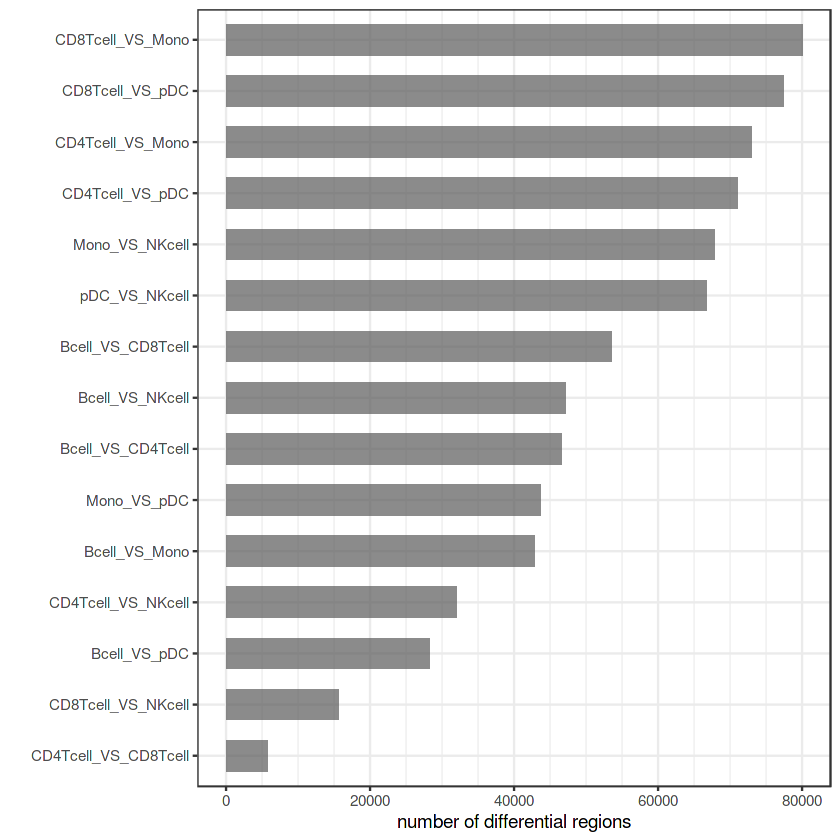

In [62]:
library(ggplot2)
library(dplyr)
library(forcats)
# Reorder following the value of another column:
plot_num_diff_regions_per_comparison <-num_diff_reg_per_comparison_df %>%
  mutate(comparisons = fct_reorder(comparisons, num_diff_reg)) %>%
  ggplot( aes(x=comparisons, y=num_diff_reg)) +
    geom_bar(stat="identity", , alpha=.7, width=.6) +
    coord_flip() +
    xlab("") + ylab("number of differential regions") +
    scale_y_continuous(minor_breaks = seq(0, 80000, 5000),) +
    theme_bw()
plot_num_diff_regions_per_comparison

In [63]:
ggsave("./figures/plot_num_diff_regions_per_comparison.png")


Saving 6.67 x 6.67 in image



In [64]:
combined_regions_unique = unique(combined_regions)

In [65]:
length(combined_regions_unique)

[1] 168130

## FILTER THE DIFFERENTIAL REGIONS:

### TOP 2000 REGIONS OF EACH PAIRWISE COMPARISON
#### ## remove the chrY regions

In [66]:
combined_regions_top2000 =c()
for (df_ in list(Bcell_VS_CD4Tcell, Bcell_VS_CD8Tcell, Bcell_VS_Mono, Bcell_VS_NKcell, Bcell_VS_pDC, CD4Tcell_VS_CD8Tcell, CD4Tcell_VS_Mono, CD4Tcell_VS_NKcell, CD4Tcell_VS_pDC, CD8Tcell_VS_Mono, CD8Tcell_VS_NKcell, CD8Tcell_VS_pDC, Mono_VS_NKcell, Mono_VS_pDC, pDC_VS_NKcell )){
    df_= df_[df_[["seqnames"]] !="chrY",]
    top2000_regions = df_[sort(abs(df_[["Fold"]]),decreasing=T,index.return=T)[[2]],][1:2000,][["region"]]
    top2000_merged_name = gsub(":", "_", gsub("-", "_", top2000_regions, fixed = TRUE) , fixed = TRUE)
    combined_regions_top2000 =  c(combined_regions_top2000,top2000_merged_name )
}

In [67]:
combined_regions_top2000[1:50]

[1] "chr3_113005661_113006061"  "chr3_68057657_68058057"   
 [3] "chr6_127971988_127972388"  "chr1_239501707_239502107" 
 [5] "chr18_74373419_74374018"   "chr8_19497094_19497494"   
 [7] "chr2_45728496_45728896"    "chr17_35214204_35214604"  
 [9] "chrX_13151884_13152284"    "chr12_44828092_44828492"  
[11] "chrX_16528645_16529045"    "chr1_234408721_234409121" 
[13] "chr11_85823869_85824269"   "chr11_13869018_13869418"  
[15] "chr1_221166609_221167292"  "chr1_61782676_61783076"   
[17] "chr11_88843349_88844638"   "chr11_35247386_35247786"  
[19] "chr9_31259851_31260251"    "chr5_124034926_124035326" 
[21] "chr14_35203691_35204346"   "chr4_7854992_7855392"     
[23] "chr9_101569875_101570502"  "chr1_219090624_219091024" 
[25] "chr2_197869579_197870189"  "chr8_96861321_96861721"   
[27] "chr16_21360087_21360487"   "chr3_56593483_56593883"   
[29] "chr1_64877144_64877544"    "chr4_102630672_102631072" 
[31] "chr3_108806370_108806770"  "chr12_12482219_12482619"  
[33] "chr5_52725118_52725990"    "chr22_17594607_17595007"  
[35] "chrX_124736537_124737277"  "chr2_101570830_101571230" 
[37] "chr11_128476700_128477100" "chr3_108835068_108835468" 
[39] "chr19_2681518_2681918"     "chr14_38065083_38065483"  
[41] "chr6_139113249_139113649"  "chr2_148524463_148524863" 
[43] "chr1_116933591_116933991"  "chr8_128191190_128191590" 
[45] "chr2_112996631_112997031"  "chr3_7876852_7877252"     
[47] "chr21_25186297_25186697"   "chr5_157180613_157181013" 
[49] "chr16_89374979_89375379"   "chr3_128316464_128317077"

In [68]:
combined_regions_top2000_sorted = sort(combined_regions_top2000)

In [69]:
library(tidyverse)
combined_regions_top2000_3col = as.data.frame(combined_regions_top2000_sorted) %>% 
   separate(combined_regions_top2000_sorted, into = c("seq", "start", "end"), sep="_")


── Attaching packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.6     ✔ purrr   0.3.4
✔ readr   2.1.3     ✔ stringr 1.4.0

── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ ggplot2::Position() masks BiocGenerics::Position(), base::Position()
✖ dplyr::collapse()   masks IRanges::collapse()
✖ dplyr::combine()    masks Biobase::combine(), BiocGenerics::combine()
✖ dplyr::count()      masks matrixStats::count()
✖ dplyr::desc()       masks IRanges::desc()
✖ tidyr::expand()     masks S4Vectors::expand()
✖ dplyr::filter()     masks stats::filter()
✖ 

In [70]:
head(combined_regions_top2000_3col)

,seq,start,end
,<chr>,<chr>,<chr>
1,chr10,100014032,100014674
2,chr10,100020279,100021256
3,chr10,100204338,100204738
4,chr10,100204338,100204738
5,chr10,100256949,100257349
6,chr10,100256949,100257349


In [71]:
tail(combined_regions_top2000_3col)


,seq,start,end
,<chr>,<chr>,<chr>
29995,chrX,97597940,97598340
29996,chrX,9899642,9900042
29997,chrX,9940311,9940711
29998,chrX,9940311,9940711
29999,chrX,9940311,9940711
30000,chrX,9942112,9942512


In [73]:
write.table(combined_regions_top2000_3col, "../../../../data/Corces2016_bulk_ATAC/03_get_differentially_accessible_regions/terminal_cell_states-for_PBMC_scmultiome/Corces2016_pairwise_differential_cCREs_FDR0.05_top2000_of_each_pair.bed", sep = "\t", col.names=FALSE,quote=FALSE, row.names = FALSE)


## again: --> NOTE THAT THE PEAK REGIONS ARE MERGED DURING THE PROCESSING AND THE REGIONS GIVEN ABOVE NO LONGER CORRESPOND TO ENCODE cCREs. I NEED TO OBTAIN THE CORRESPONDING cCREs

In [74]:
exact_match_differential_cCREs_top2000_ = read.table("../../../../data/Corces2016_bulk_ATAC/03_get_differentially_accessible_regions/terminal_cell_states-for_PBMC_scmultiome/Corces2016_pairwise_differential_cCREs_FDR0.05_top2000_of_each_pair_sorted_exactCREs.bed", header = FALSE, sep="\t")

In [75]:
head(exact_match_differential_cCREs_top2000_)

,V1,V2,V3
,<chr>,<int>,<int>
1,chr1,1216791,1217011
2,chr1,1217013,1217334
3,chr1,1607107,1607413
4,chr1,1629532,1629772
5,chr1,1629775,1630119
6,chr1,1677810,1678155


In [78]:
dim(exact_match_differential_cCREs_top2000_)

[1] 19481     3

In [79]:
exact_match_differential_cCREs_top2000_["region"]=paste(exact_match_differential_cCREs_top2000_$V1, exact_match_differential_cCREs_top2000_$V2, exact_match_differential_cCREs_top2000_$V3, sep="_")

In [80]:
head(exact_match_differential_cCREs_top2000_)

,V1,V2,V3,region
,<chr>,<int>,<int>,<chr>
1,chr1,1216791,1217011,chr1_1216791_1217011
2,chr1,1217013,1217334,chr1_1217013_1217334
3,chr1,1607107,1607413,chr1_1607107_1607413
4,chr1,1629532,1629772,chr1_1629532_1629772
5,chr1,1629775,1630119,chr1_1629775_1630119
6,chr1,1677810,1678155,chr1_1677810_1678155


In [81]:
write.table(exact_match_differential_cCREs_top2000_["region"], "../../../../data/Corces2016_bulk_ATAC/03_get_differentially_accessible_regions/terminal_cell_states-for_PBMC_scmultiome/Corces2016_pairwise_differential_cCREs_FDR0.05_top2000_of_each_pair_sorted_exactCREs.csv", sep = ",", col.names=FALSE,quote=FALSE, row.names = FALSE)
